# Esse código cria os histogramas para as cotas acima  das cotas de alerta
# This code Gernerates the Histograms for Water Level Analyses over the Alert level (Cota de Alerta)
# for the hydrometric stations

## Plotting the Histograms of the Stations

### 1. Leitura do arquivo CSV e criação do DataFrame:
### 1. Reading the CSV file and creating the dataframe:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lê o arquivo CSV com o separador ';'
df = pd.read_csv('../input_data/dados_resumo_cotas.csv', sep=';')

# Converter a coluna 'data' para o tipo datetime
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

# Convert `altura_mare` from meters to centimeters by multiplying by 100
df['altura_mare'] = df['altura_mare'].mul(100).fillna(0)

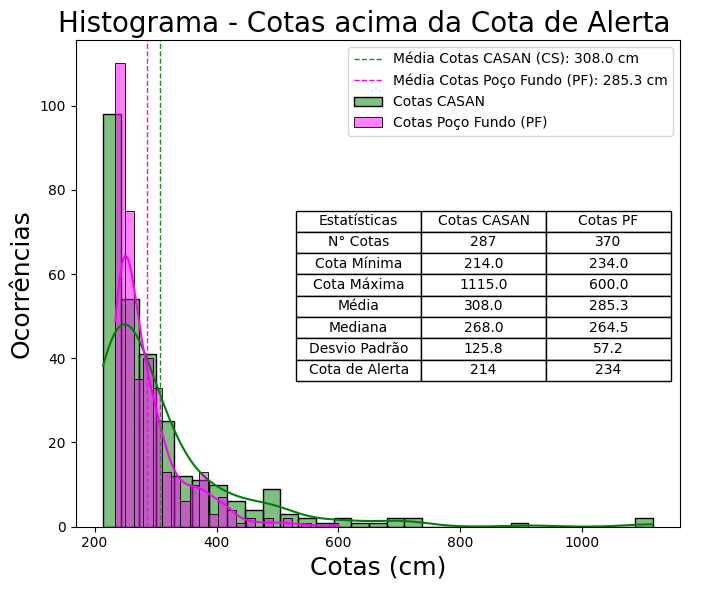

In [2]:
# Criação do subplot para as cotas_cs e cotas_pf:
fig, ax = plt.subplots(figsize=(7, 6)) # (Largura, Altura)

# Histograma para cotas_cs (verde)
sns.histplot(df['cotas_cs'].dropna(), ax=ax, kde=True, color='green', label='Cotas CASAN')

# Histograma para cotas_pf (magenta)
sns.histplot(df['cotas_pf'].dropna(), ax=ax, kde=True, color='magenta', label='Cotas Poço Fundo (PF)')

# Títulos e rótulos
ax.set_xlabel('Cotas (cm)', fontsize=18)
ax.set_ylabel('Ocorrências', fontsize=18)
ax.set_title('Histograma - Cotas acima da Cota de Alerta   ', fontsize=20, loc='center')
ax.legend()


# Criação da Tabela:
# Calcula as estatísticas para a cotas_cs
count_cs = df['cotas_cs'].count()
min_cota_cs = df['cotas_cs'].min()
max_cota_cs = df['cotas_cs'].max()
media_cs = df['cotas_cs'].mean()
mediana_cs = df['cotas_cs'].median()
desvio_padrao_cs = df['cotas_cs'].std()  # Calcula o desvio padrão
nivel_alerta_cs = 214
# Calcula as estatísticas para a cotas_pf
count_pf = df['cotas_pf'].count()
min_cota_pf = df['cotas_pf'].min()
max_cota_pf = df['cotas_pf'].max()
media_pf = df['cotas_pf'].mean()
mediana_pf = df['cotas_pf'].median()
desvio_padrao_pf = df['cotas_pf'].std()  # Calcula o desvio padrão
nivel_alerta_pf = 234

# Dados da tabela
dados_tabela = {
    'Estatísticas': ['N° Cotas', 'Cota Mínima', 'Cota Máxima', 'Média', 'Mediana', 'Desvio Padrão', 'Cota de Alerta'],
    'Cotas CASAN': [count_cs, min_cota_cs, max_cota_cs, f'{media_cs:.1f}', f'{mediana_cs:.1f}', f'{desvio_padrao_cs:.1f}', nivel_alerta_cs],
    'Cotas PF': [count_pf, min_cota_pf, max_cota_pf, f'{media_pf:.1f}', f'{mediana_pf:.1f}', f'{desvio_padrao_pf:.1f}', nivel_alerta_pf]
}

# Cria um DataFrame para a tabela
df_tabela = pd.DataFrame(dados_tabela)

# Cria a tabela no subplot do histograma
# tabela = ax.table(cellText=df_tabela.values, colLabels=df_tabela.columns, loc='upper right', cellLoc='center', bbox=[0.645, 0.5, 0.35, 0.3])  # Valores ajustados
tabela = ax.table(cellText=df_tabela.values, colLabels=df_tabela.columns, loc='upper right', cellLoc='center', bbox=[0.365, 0.3, 0.62, 0.35])  # Valores ajustados
# Aumentar os valores de bbox:
    # Aumente o primeiro valor (coordenada x) para mover a tabela para a direita.
    # Aumente o segundo valor (coordenada y) para mover a tabela para cima.
    # Aumente o terceiro valor (largura) para expandir a tabela horizontalmente.
    # Aumente o quarto valor (altura) para expandir a tabela verticalmente.


# Formata a tabela (opcional)
tabela.auto_set_font_size(True)
# tabela.set_fontsize(13)
# Se você precisar ajustar o espaçamento vertical entre as linhas da tabela, você pode usar o método scale da tabela para aumentar a altura das células:
# tabela.scale(1, 2)  # Ajusta a altura das células
tabela.scale(2, 2)  # Aumenta a largura e altura das células


# Fim tabela

# Plota as médias no histograma
media_cs = df['cotas_cs'].mean()
ax.axvline(media_cs, color='forestgreen', linestyle='dashed', linewidth=1, label=f'Média Cotas CASAN (CS): {media_cs:.1f} cm')

media_pf = df['cotas_pf'].mean()
ax.axvline(media_pf, color='magenta', linestyle='dashed', linewidth=1, label=f'Média Cotas Poço Fundo (PF): {media_pf:.1f} cm')

# Chama a legenda novamente para incluir as médias
ax.legend()  
# Ajustes para melhor visualização
plt.tight_layout()

# Save the plot with specified resolution and size
plt.savefig('../output_data/images/grafico_histogramas_estacoes.png', dpi=900)

# Ajustes finais
plt.tight_layout()
plt.show()
